In [1]:
import pandas as pd

In [2]:
#import dataset for cleaning  
dataset = pd.read_csv('economic data.csv')

In [3]:
print(dataset.head())

   Year ISO Code             Countries  Economic Freedom Summary Index   Rank  \
0  2021      AGO                Angola                            5.38  149.0   
1  2021      ALB               Albania                            7.60   31.0   
2  2021      ARE  United Arab Emirates                            7.35   50.0   
3  2021      ARG             Argentina                            4.77  158.0   
4  2021      ARM               Armenia                            7.58   33.0   

   Quartile  Size of Government  Legal System & Property Rights  Sound Money  \
0       4.0                7.71                            3.18         5.79   
1       1.0                7.73                            5.28         9.59   
2       2.0                5.28                            7.03         8.99   
3       4.0                6.21                            4.98         4.04   
4       1.0                7.76                            5.92         9.12   

   Freedom to trade internationa

In [4]:
dataset.isnull().sum()

Year                                 0
ISO Code                             0
Countries                            0
Economic Freedom Summary Index      24
Rank                                24
Quartile                            24
Size of Government                  20
Legal System & Property Rights      24
Sound Money                         21
Freedom to trade internationally    53
Regulation                           0
dtype: int64

In [5]:
null_columns = [
    'Economic Freedom Summary Index', 'Rank', 'Quartile', 'Size of Government',
    'Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally'
]

In [6]:
#input 0 where columns are null
dataset[null_columns] = dataset[null_columns].fillna(0)

In [7]:
#check null columns after cleaning
print(dataset.isnull().sum())

Year                                0
ISO Code                            0
Countries                           0
Economic Freedom Summary Index      0
Rank                                0
Quartile                            0
Size of Government                  0
Legal System & Property Rights      0
Sound Money                         0
Freedom to trade internationally    0
Regulation                          0
dtype: int64


In [8]:
# Identify duplicates
duplicates = dataset.duplicated()    
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1810    False
1811    False
1812    False
1813    False
1814    False
Length: 1815, dtype: bool


In [9]:
# Remove duplicates
dataset.drop_duplicates(inplace=True)

In [10]:
print(dataset)

      Year ISO Code             Countries  Economic Freedom Summary Index  \
0     2021      AGO                Angola                            5.38   
1     2021      ALB               Albania                            7.60   
2     2021      ARE  United Arab Emirates                            7.35   
3     2021      ARG             Argentina                            4.77   
4     2021      ARM               Armenia                            7.58   
...    ...      ...                   ...                             ...   
1810  2011      VNM               Vietnam                            5.65   
1811  2011      YEM           Yemen, Rep.                            5.89   
1812  2011      ZAF          South Africa                            6.98   
1813  2011      ZMB                Zambia                            6.83   
1814  2011      ZWE              Zimbabwe                            4.54   

       Rank  Quartile  Size of Government  Legal System & Property Rights  

In [11]:
dataset.to_csv('economic_freedom.csv')

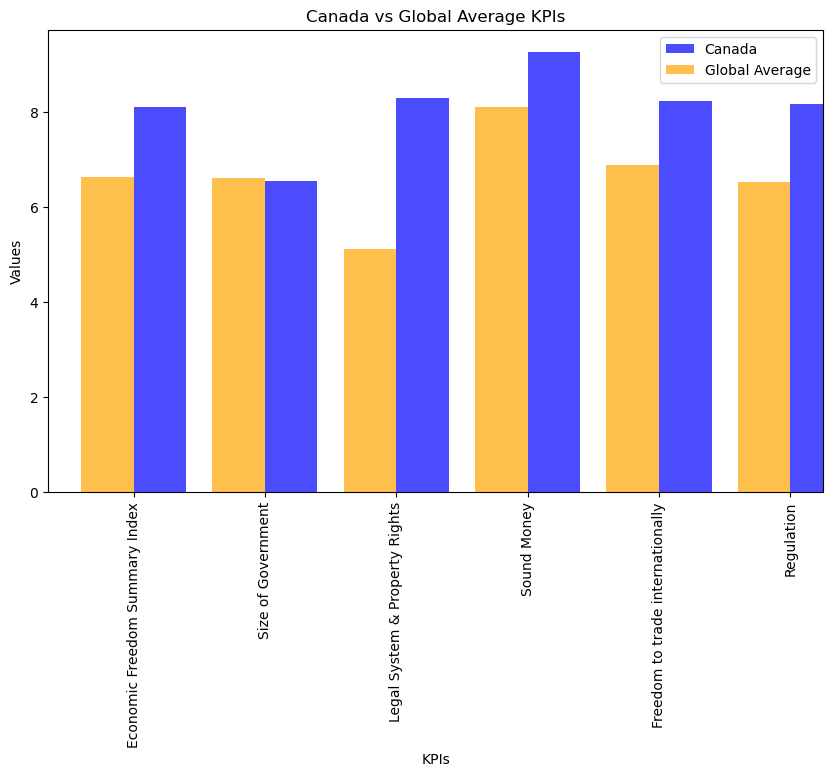

In [17]:
#exploratory analysis  
import matplotlib.pyplot as plt

# Define KPI columns
kpi_columns = ['Economic Freedom Summary Index', 'Size of Government', 
               'Legal System & Property Rights', 'Sound Money', 
               'Freedom to trade internationally', 'Regulation']

# Calculate global averages
global_averages = dataset[kpi_columns].mean()

# Extract Canada's data
canada_data = dataset[dataset['Countries'] == 'Canada'][kpi_columns].mean()

# Bar Chart: Canada vs Global Averages
plt.figure(figsize=(10, 6))
canada_data.plot(kind='bar', color='blue', alpha=0.7, position=0, width=0.4, label='Canada')
global_averages.plot(kind='bar', color='orange', alpha=0.7, position=1, width=0.4, label='Global Average')
plt.title('Canada vs Global Average KPIs')
plt.xlabel('KPIs')
plt.ylabel('Values')
plt.legend()
plt.show()



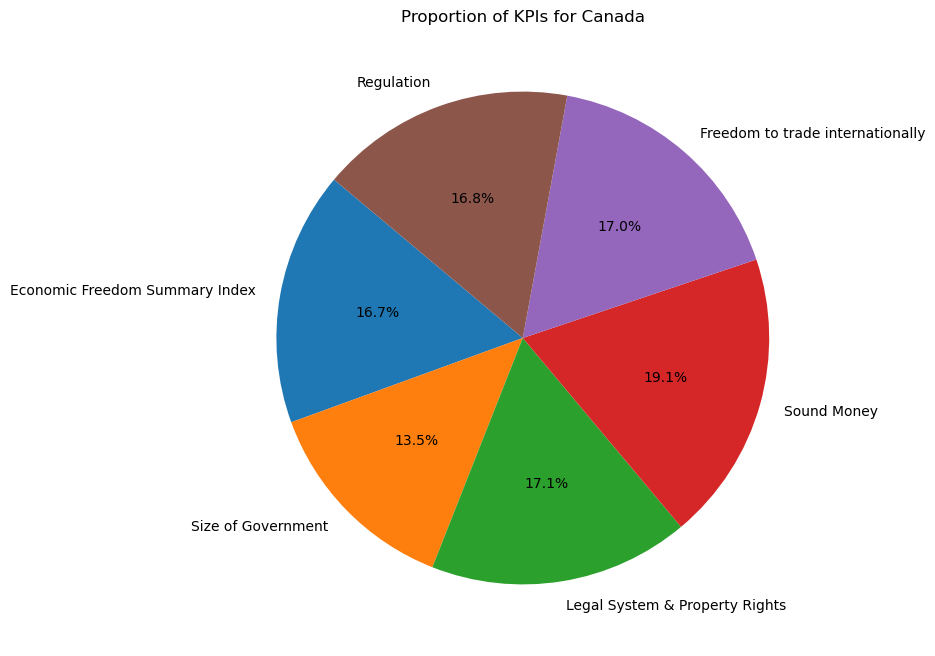

In [18]:
# Pie Chart: Proportion of KPIs for Canada
plt.figure(figsize=(8, 8))
canada_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of KPIs for Canada')
plt.ylabel('')
plt.show()


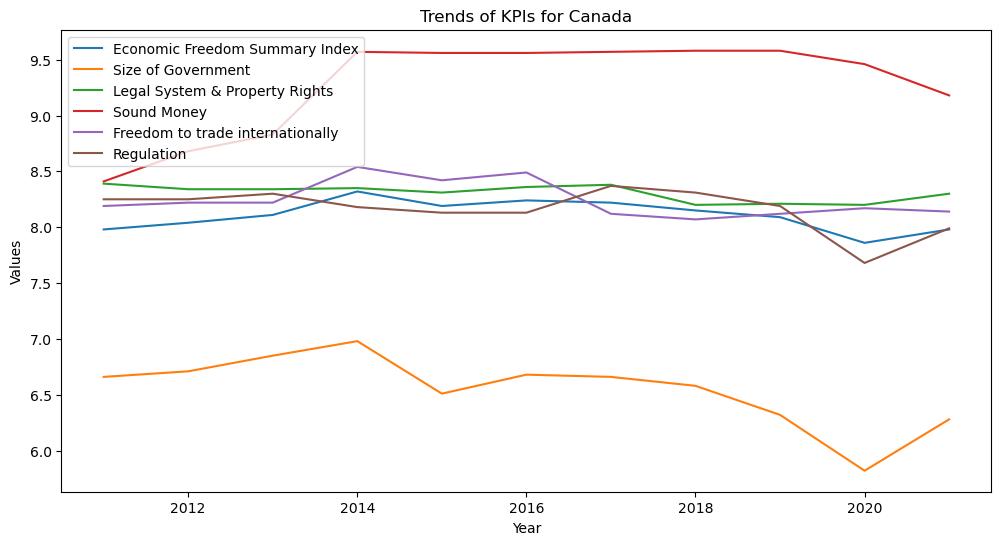

In [19]:
if 'Year' in dataset.columns:
    df_canada = dataset[dataset['Countries'] == 'Canada']
    plt.figure(figsize=(12, 6))
    for kpi in kpi_columns:
        plt.plot(df_canada['Year'], df_canada[kpi], label=kpi)
    plt.title('Trends of KPIs for Canada')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

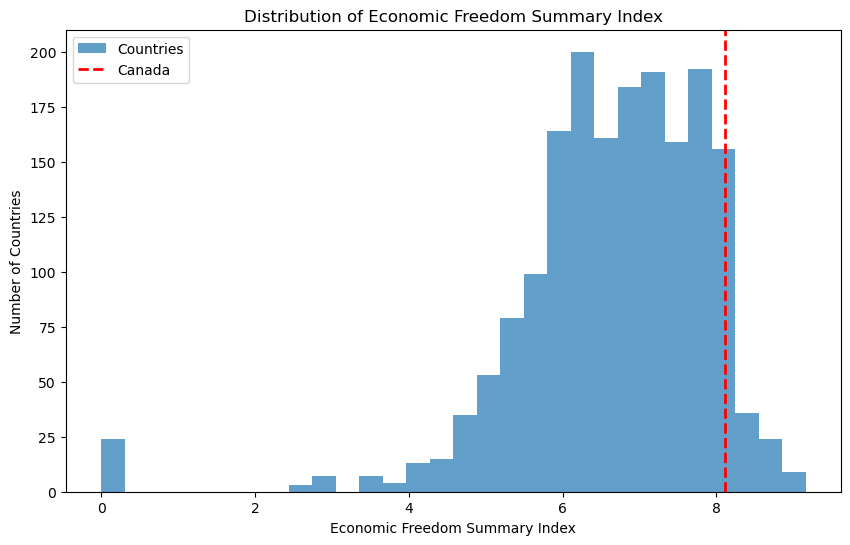

In [23]:
# Extract the Economic Freedom Summary Index for all countries
economic_freedom = dataset['Economic Freedom Summary Index']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(economic_freedom, bins=30, alpha=0.7, label='Countries')

# Highlight Canada's position
canada_value = canada_data['Economic Freedom Summary Index']
plt.axvline(canada_value, color='red', linestyle='dashed', linewidth=2, label='Canada')

# Add titles and labels
plt.title('Distribution of Economic Freedom Summary Index')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Number of Countries')
plt.legend()
plt.show()


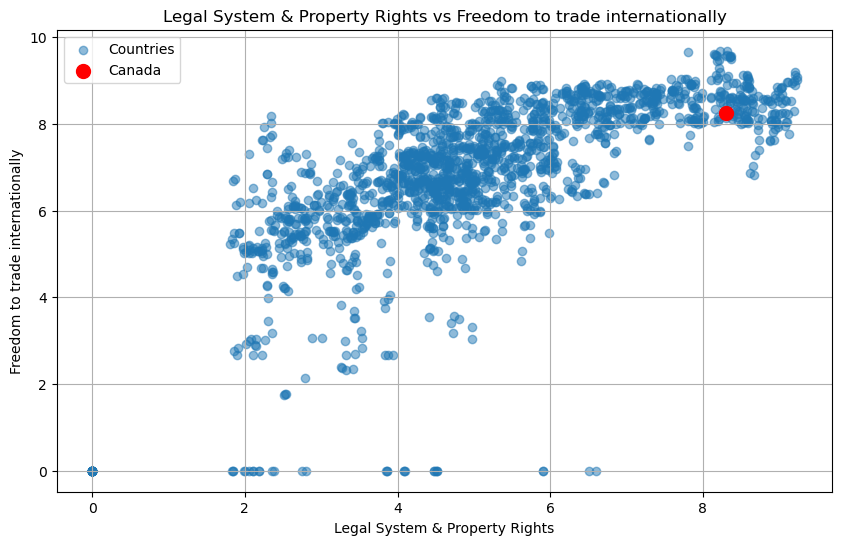

In [22]:
# Scatter Plot: Legal System & Property Rights vs Freedom to trade internationally
plt.figure(figsize=(10, 6))
countries = dataset['Countries']
x = dataset['Legal System & Property Rights']
y = dataset['Freedom to trade internationally']

plt.scatter(x, y, alpha=0.5, label='Countries')
plt.scatter(canada_data['Legal System & Property Rights'], canada_data['Freedom to trade internationally'], color='red', label='Canada', s=100)
plt.title('Legal System & Property Rights vs Freedom to trade internationally')
plt.xlabel('Legal System & Property Rights')
plt.ylabel('Freedom to trade internationally')
plt.legend()
plt.grid(True)
plt.show()
